# 1) 데이터 읽기

In [46]:
import pandas as pd

df = pd.read_csv('./abalone.csv')

df = df.drop('id', axis = 1)

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [47]:
df = pd.get_dummies(df, columns=['Sex'])

df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,True,False,False
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,False,False,True
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,False,False,True
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,True,False,False


In [48]:
# 각 값의 개수를 계산
value_counts = df['Rings'].value_counts()

# 100개 이상인 값 필터링
to_keep = value_counts[value_counts >= 100].index

# 원본 DataFrame에서 해당 값을 가진 행만 남김
df = df[df['Rings'].isin(to_keep)]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3842 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3842 non-null   float64
 1   Diameter        3842 non-null   float64
 2   Height          3842 non-null   float64
 3   Whole_weight    3842 non-null   float64
 4   Shucked_weight  3842 non-null   float64
 5   Viscera_weight  3842 non-null   float64
 6   Shell_weight    3842 non-null   float64
 7   Rings           3842 non-null   int64  
 8   Sex_F           3842 non-null   bool   
 9   Sex_I           3842 non-null   bool   
 10  Sex_M           3842 non-null   bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 281.4 KB


# 2) 결측치 확인

In [50]:
# 결측치 확인
df.isnull().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

# 3) 상관 관계 행렬 확인하기

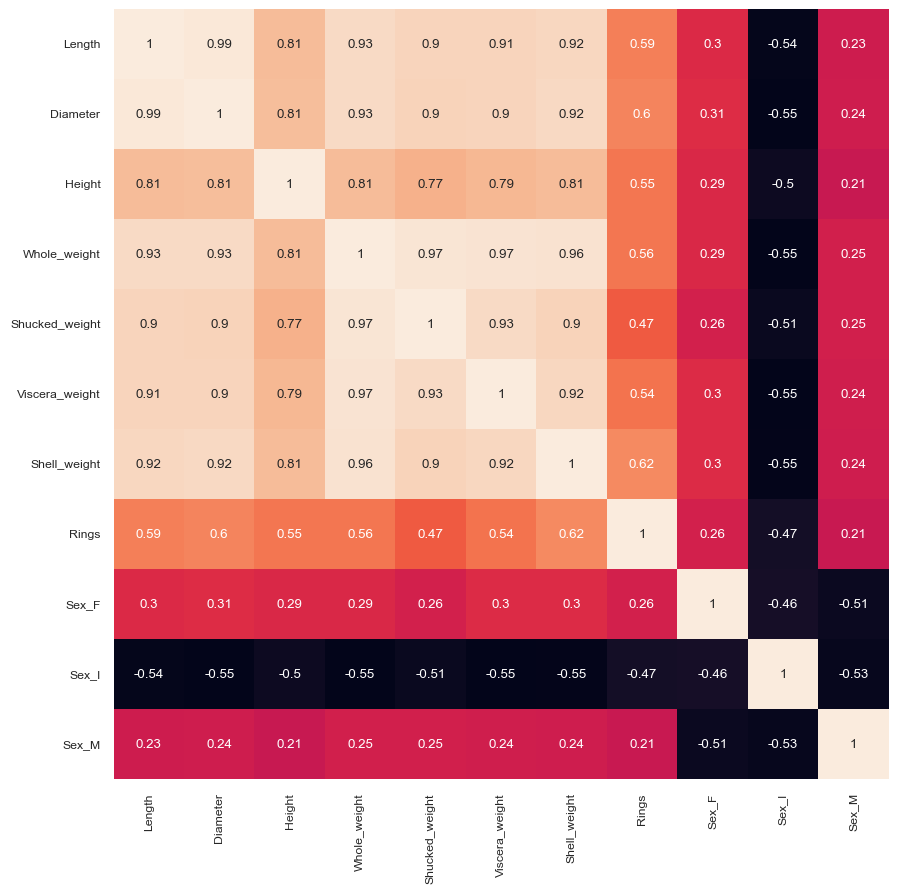

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# BMI와 가장 높은 상관관계를 가진 feature : Shell_weight

# 4) X, Y 나누기

In [52]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

print(X.head())
print()
print(Y.value_counts())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150  False  False   True  
1         0.070  False  False   True  
2         0.210   True  False  False  
3         0.155  False  False   True  
4         0.055  False   True  False  

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64


# 5) 데이터 스케일링

In [53]:
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler


scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.614302,-0.459694,-1.093299,-0.637889,-0.613253,-0.727033,-0.636132,-0.667826,-0.695680,1.317751
1,-1.535413,-1.521813,-1.217743,-1.242812,-1.178809,-1.214092,-1.252816,-0.667826,-0.695680,1.317751
2,0.043634,0.124471,-0.097754,-0.296112,-0.468470,-0.351302,-0.173620,1.497396,-0.695680,-0.758869
3,-0.745890,-0.459694,-0.346640,-0.633695,-0.653973,-0.606428,-0.597590,-0.667826,-0.695680,1.317751
4,-1.710863,-1.628025,-1.466629,-1.285796,-1.224054,-1.297588,-1.368444,-0.667826,1.437443,-0.758869
...,...,...,...,...,...,...,...,...,...,...
4172,0.350671,0.443107,0.648906,0.144213,0.045055,0.553237,0.127013,1.497396,-0.695680,-0.758869
4173,0.569983,0.336895,-0.097754,0.309859,0.357242,0.325942,0.215662,-0.667826,-0.695680,1.317751
4174,0.657708,0.708637,1.644451,0.750185,0.748607,1.003187,0.581817,-0.667826,-0.695680,1.317751
4175,0.877020,0.814849,0.275576,0.579297,0.773492,0.757338,0.489315,1.497396,-0.695680,-0.758869


# 6) One-Hot 인코딩

In [54]:
Y = pd.get_dummies(Y).values

Y

array([[False, False, False, ..., False, False,  True],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# 7) Train데이터, Test데이터 나누기

In [55]:
# split X_train, Y_train, X_test, Y_test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# 8) 딥러닝 모델 정의

In [56]:
# 신경망 모델 구축
from keras import Input
from keras import Model
from keras.layers import Dense
from keras.optimizers import Adam

inputs = Input(shape =(10, ))
layer0 = Dense(16, activation = "relu")(inputs)
layer1 = Dense(16, activation = "relu")(layer0)
prediction = Dense(1)(layer1)

model = Model(inputs = inputs, outputs = prediction)

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

# 9) 학습, 예측

In [35]:
import numpy as np

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 확률에 가장 가까운 정수로 class를 예측
y_pred_class = np.argmax(y_pred,axis=1)

# y_pred_class one-hot-encoding
Y_pred_class = pd.get_dummies(y_pred_class).values

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1001 - mse: 0.1001 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0838 - mse: 0.0838 - val_loss: 0.0835 - val_mse: 0.0835
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0831 - mse: 0.0831 - val_loss: 0.0833 - val_mse: 0.0833
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0830 - mse: 0.0830 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0828 - val_mse: 0.0828
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829 - mse: 0.0829 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0828 - mse: 0.0828 - val_loss: 0.0829 - val_mse: 0.0829
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0828 - mse: 0.0828 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0828 - mse: 

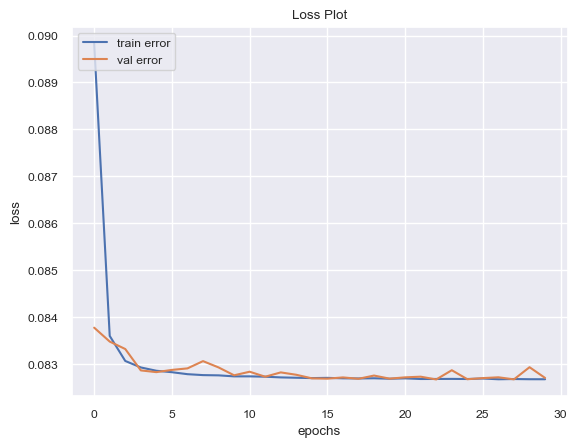

In [36]:
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['mse']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [37]:
model.evaluate(X_test, Y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0827 - mse: 0.0827 


[0.0827019065618515, 0.0827019065618515]

Rings은 순차적 데이터이다. One-Hot Encoding을 하지 않는다면 결과는 어떻게 달라질지 확인해보자.

In [57]:
X = df.drop('Rings', axis = 1)
Y = df['Rings']

print(X.head())
print()
print(Y.value_counts())

   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150  False  False   True  
1         0.070  False  False   True  
2         0.210   True  False  False  
3         0.155  False  False   True  
4         0.055  False   True  False  

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
Name: count, dtype: int64


In [58]:
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled_data,
                            index = X.index,
                            columns = X.columns) 

X

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,-0.614302,-0.459694,-1.093299,-0.637889,-0.613253,-0.727033,-0.636132,-0.667826,-0.695680,1.317751
1,-1.535413,-1.521813,-1.217743,-1.242812,-1.178809,-1.214092,-1.252816,-0.667826,-0.695680,1.317751
2,0.043634,0.124471,-0.097754,-0.296112,-0.468470,-0.351302,-0.173620,1.497396,-0.695680,-0.758869
3,-0.745890,-0.459694,-0.346640,-0.633695,-0.653973,-0.606428,-0.597590,-0.667826,-0.695680,1.317751
4,-1.710863,-1.628025,-1.466629,-1.285796,-1.224054,-1.297588,-1.368444,-0.667826,1.437443,-0.758869
...,...,...,...,...,...,...,...,...,...,...
4172,0.350671,0.443107,0.648906,0.144213,0.045055,0.553237,0.127013,1.497396,-0.695680,-0.758869
4173,0.569983,0.336895,-0.097754,0.309859,0.357242,0.325942,0.215662,-0.667826,-0.695680,1.317751
4174,0.657708,0.708637,1.644451,0.750185,0.748607,1.003187,0.581817,-0.667826,-0.695680,1.317751
4175,0.877020,0.814849,0.275576,0.579297,0.773492,0.757338,0.489315,1.497396,-0.695680,-0.758869


Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 84.8751 - mse: 84.8751 - val_loss: 51.9576 - val_mse: 51.9576
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.7839 - mse: 43.7839 - val_loss: 13.3990 - val_mse: 13.3990
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4811 - mse: 9.4811 - val_loss: 3.8361 - val_mse: 3.8361
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6841 - mse: 3.6841 - val_loss: 3.1307 - val_mse: 3.1307
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5458 - mse: 3.5458 - val_loss: 3.0937 - val_mse: 3.0937
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2673 - mse: 3.2673 - val_loss: 2.9913 - val_mse: 2.9913
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1593 - mse: 3.1593 - val_loss: 2.9453 - val_mse: 2.9453
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6885 - mse: 2.6885 - val_loss: 2.8859 - val_mse: 2.8859
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4464

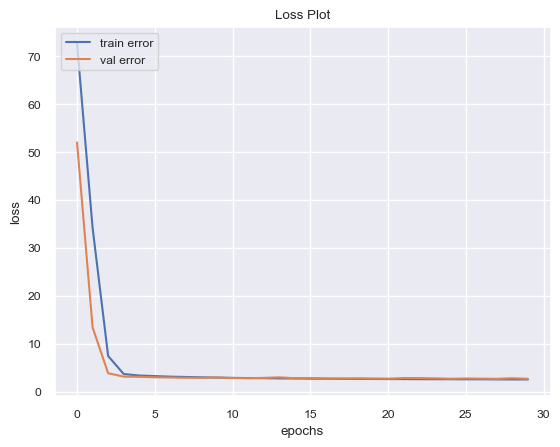

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['mse']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [61]:
model.evaluate(X_test, Y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.6193 - mse: 2.6193 


[2.671492338180542, 2.671492338180542]

One-Hot Encoding을 하니까 정확도가 낮아졌다.
그렇다면 만약, Y값을 Scaling하게 된다면 어떻게 될까?

In [68]:
df['Rings_scaled'] = scaler.fit_transform(df[['Rings']])

Y = df['Rings_scaled']

Y

C:\Users\황주신\AppData\Local\Temp\ipykernel_17644\2060364133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rings_scaled'] = scaler.fit_transform(df[['Rings']])


0       2.387047
1      -1.078625
2      -0.212207
3       0.221002
4      -1.078625
          ...   
4172    0.654211
4173    0.221002
4174   -0.212207
4175    0.221002
4176    1.087420
Name: Rings_scaled, Length: 3842, dtype: float64

Epoch 1/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51.1473 - mse: 51.1473 - val_loss: 6.5473 - val_mse: 6.5473
Epoch 2/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0989 - mse: 4.0989 - val_loss: 0.7257 - val_mse: 0.7257
Epoch 3/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6061 - mse: 0.6061 - val_loss: 0.5592 - val_mse: 0.5592
Epoch 4/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5304 - mse: 0.5304 - val_loss: 0.5422 - val_mse: 0.5422
Epoch 5/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5062 - mse: 0.5062 - val_loss: 0.5432 - val_mse: 0.5432
Epoch 6/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4952 - mse: 0.4952 - val_loss: 0.5201 - val_mse: 0.5201
Epoch 7/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4884 - mse: 0.4884 - val_loss: 0.5122 - val_mse: 0.5122
Epoch 8/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4791 - mse: 0.4791 - val_loss: 0.5248 - val_mse: 0.5248
Epoch 9/30
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4527 - mse

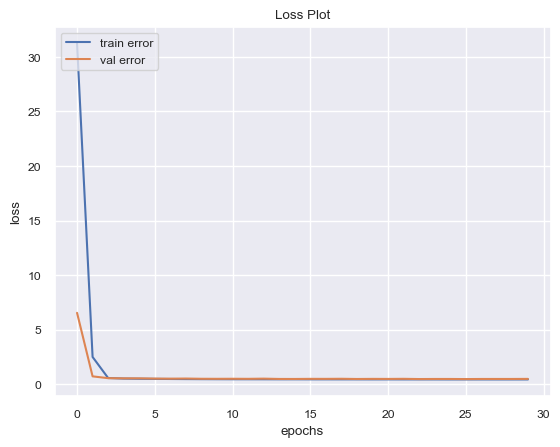

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model_history=model.fit(x=X_train, y=Y_train, epochs=30, batch_size=32,validation_data= (X_test,Y_test))
y_pred = model.predict(X_test)

# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = model_history.history
loss_values = history_dict['loss']
val_loss_value = history_dict['val_loss']
acc = history_dict['mse']
epochs = range(1, len(acc) + 1)

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc = 'upper left')
plt.show()

In [70]:
model.evaluate(X_test, Y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4878 - mse: 0.4878 


[0.49343404173851013, 0.49343404173851013]

결국은 One-Hot Encoding을 했을 때, 가장 좋은 결과를 나타냈다. 이유를 알 수 가 없다...